# CS170A -- HW#1 -- assignment and solution form -- Python

Your name:  ______________________

Your UID:  _________

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## NOTE:  In this assignment we provide pseudocode to get you started.

In later assignments we will not do this.

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as spstats

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import pandas as pd

X = pd.read_csv('mandrill_X.csv', header=None).as_matrix()
X.shape

map = pd.read_csv('mandrill_map.csv', header=None).as_matrix()
map.shape

def map_R(i): return map[i-1,0]

def map_G(i): return map[i-1,1]

def map_B(i): return map[i-1,2]

ind2r = np.vectorize(map_R)   # apply the map_R function to every member of an array
ind2g = np.vectorize(map_G)   # apply the map_G function to every member of an array
ind2b = np.vectorize(map_B)   # apply the map_B function to every member of an array

def ind2rgb(X):
    return np.stack( [ind2r(X), ind2g(X), ind2b(X)], axis=2)

Mandrill = ind2rgb(X)
Mandrill.shape

(480, 500, 3)

In [4]:
GrayMandrill = np.mean( Mandrill, axis=2 )
GrayMandrill.shape

(480, 500)

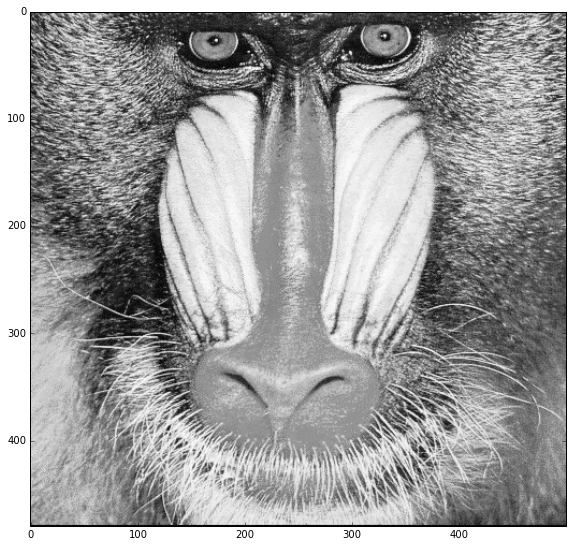

In [5]:
plt.rcParams['figure.figsize'] = (9.6,10.0)

plt.imshow(GrayMandrill, cmap="Greys_r")
# strange default cmap; see:  http://matplotlib.org/users/image_tutorial.html
plt.show()

# Problem 1:  SVD k-th order approximations (30 points)

If $A$ is a matrix that has SVD $A = U\,S\,V'$,
the <b>rank-k approximation of $A$</b>
keeping only the first $k$ columns of the SVD.

Specifically, given a $n \times p$ matrix $A$ with SVD $A = U\,S\,V'$,
then if $k \leq n$ and $k \leq p$, the rank-$k$ approximation of $A$ is
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V'
$$
where $S^{(k)}$ is the result of setting all diagonal elements to zero after the first $k$ entries
$(1 \leq k \leq p)$.
If $U^{(k)}$ and $V^{(k)}$ are like $U$ and $V$ but with all columns zero after the first $k$, then
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V' ~~=~~ U^{(k)} ~ S^{(k)} ~ V^{(k)'} .
$$


In class, we saw a demo of the attached Matlab script <tt>imagesvdgui.m</tt>
--- and the effectiveness of this approximation in retaining information about an image.

The goal of this problem is to implement this approximation
for black-and-white (grayscale) images.

In [6]:
def full_svd(A):
    U, sigma, VT = np.linalg.svd(A, full_matrices=True)
    n, p = A.shape
    S = np.zeros((n,p))
    k = min(n,p)
    S[:k,:k] = np.diag(sigma)
    return (U, S, VT.T)

###  1.(a):  Plot Singular Values of the Rank-$k$ Approximation of an Image

As in HW0, construct a grayscale version of the Mandrill image,
and take one of the 3 color planes as a 500x480 matrix.
This is our `black and white' image $A$.
You are to analyze the rank-k approximation of the image.

Compute the SVD of $A$, and plot the singular values $\sigma_1$, $\sigma_2$, ...

In [7]:
A = GrayMandrill

U, S, V = full_svd(A)    # U, S, V are now the SVD of A

np.linalg.norm( A - U.dot(S).dot(V.T) )  #  A should match the product of U, S, V'

1.8212059578070326e-12

###  1.(b):  Optimal Rank-$k$ Approximation of an Image

Find the value of $k$ that minimizes $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~+~ k$.

In [8]:
n, p = A.shape
maximum_possible_k = min(n,p)

for k in range(maximum_possible_k):
    do_something = 0 # ................


###  1.(c):  The Rank-$k$ Approximation is a Good Approximation

In the chapter on the SVD, the course reader presents a derivation for $A \, - \, A^{(k)}$:
$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\end{eqnarray*}$$

Prove the following:
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$


#### Proof  (Enter your Proof here)
Because
$A \; - \; A^{(k)} ~ = ~ U \; (S ~ - ~ S^{(k)}) \; V '$,
..............

As a result, $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~ = ~ ...$

Therefore
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$

# Problem 2:  Baseball Visualization (40 points)

For this dataset you are given a matrix of statistics for Baseball players.
You are to perform two kinds of analysis on this matrix.

### Read in the Baseball Statistics

Statistics of top players after the last regular season game,
obtained from MLB.com, October 2016.

In [9]:
from Baseball_Players_2016 import *

## execute Baseball_Players_2016.py  to load in the data needed here

In [10]:
print(StatNames.shape)

StatNames[1:4]

(17,)


array(['G', 'AB', 'R'], 
      dtype='<U4')

In [11]:
print(Stats.shape)

(146, 17)


In [12]:
df = pd.DataFrame(Stats)
df.columns = StatNames

df.head()

,Rank,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,1.0,146.0,552.0,104.0,192.0,32.0,8.0,11.0,66.0,66.0,80.0,11.0,7.0,0.348,0.416,0.495,0.911
1,2.0,142.0,531.0,88.0,184.0,47.0,5.0,25.0,104.0,35.0,57.0,5.0,3.0,0.347,0.390,0.595,0.985
2,3.0,161.0,640.0,108.0,216.0,42.0,5.0,24.0,96.0,60.0,70.0,30.0,10.0,0.338,0.396,0.531,0.928
3,4.0,158.0,556.0,101.0,181.0,34.0,2.0,29.0,97.0,108.0,120.0,8.0,1.0,0.326,0.434,0.550,0.985
4,5.0,143.0,578.0,111.0,187.0,35.0,5.0,29.0,82.0,43.0,102.0,17.0,9.0,0.324,0.381,0.552,0.933


In [13]:
print(PlayerNames.shape)

PlayerNames[1:4]

(146,)


array(['Murphy D', 'Altuve J', 'Votto J'], 
      dtype='<U13')

### Compute a "scaled" version of the Stats matrix

We scale each column of values ${\bf x}$ in Stats
to be  ${\bf z} = ({\bf x}-\mu)/\sigma$ in ScaledStats,
where $\mu$ is the mean of the ${\bf x}$ values, and $\sigma$ is their standard deviation.

In Octave/Matlab, the function <tt>mean()</tt> computes column means,
and <tt>std()</tt> computes standard deviations.
The function <tt>zscore()</tt> computes both,
and uses them to "scale" each column in this way.

This scaling is also called __normalization__ and __standardization__.
The __z-scores__ ${\bf z} = ({\bf x}-\mu)/\sigma$ are also called
the standardized or normalized values for ${\bf x}$.

In [14]:
ScaledStats  =  spstats.zscore(Stats, axis=1, ddof=1);   #  z  =  (x-mu)/sigma

np.mean(ScaledStats, axis=1)  #  the means of each column after normalization should be 0
np.std(ScaledStats, axis=1).shape   #  the standard deviations of each column after normalization should be 1

(146,)

### 2 (a):  Random Projections
 
A fundamental problem in data science is that it is impossible to visualize a dataset that has many features.  Given an $n \times p$ dataset (matrix) $A$ in which the number of features $p$ is large, there is no obvious way to plot the data.

_Dimensionality reduction_ algorithms have been developed that attempt to find datasets that have lower values of $p$ but approximate $A$ in some way.  Although there are sophisticated algorithms, a competitive approach is to compute a ___random projection___ of $A$ into a few dimensions.  When the projection is into 2 or 3 dimensions, the result can be visualized.

A ___random $k$-D projection___ of a $n \times p$ dataset (matrix) $A$ is the result $(A \, P)$ of multiplying $A$ on the right by a $p \times k$ matrix $P$ of random values.

The result is a $n \times k$ matrix, assigning each row in $A$ a new pair of values $(x,y)$, and these can be interpreted as positions in a 2D plot.

In [15]:
IrisLines = open('iris.csv','r').read().split('\n')[1:]  # skip header line

Iris = np.array([[float(x) for x in line.split(',')] for line in IrisLines if len(line)>0])

A = Iris[:, 0:4];  # just the measurement columns

print(A.shape)

(150, 4)


random projection weights:
[[ 0.30543325  0.14765955]
 [ 0.81679572  0.43647438]
 [ 0.6725965   0.25870635]
 [ 0.54843747  0.11228741]]


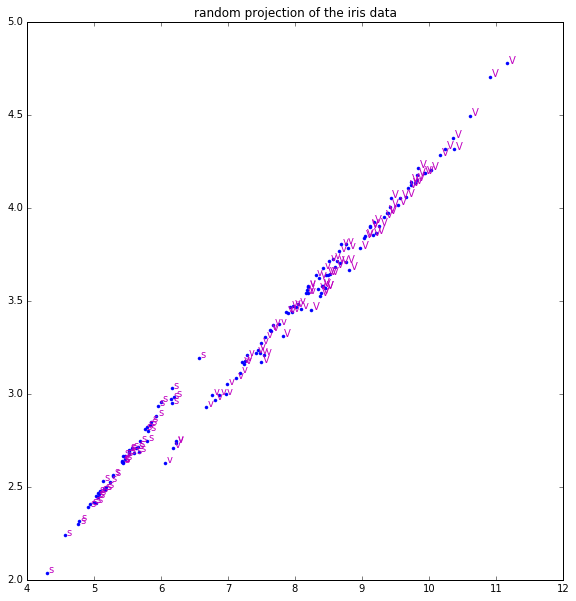

In [16]:
n, p = A.shape

P = np.random.rand(p,2)
print('random projection weights:')
print(P)
XY = A.dot(P)
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.title('random projection of the iris data')
species = ['s', 'v', 'V']
for i in range(n):
    plt.annotate( species[int(Iris[i,4]-1)], (XY[i,0]+0.025, XY[i,1]), color="m")

___Problem:___ write a function <tt>random_projection(A,k)</tt> that, given an input matrix $A$ of size $n \times p$ and an integer $k>0$, produces a random $k$-D projection.

Please use uniform random values in the matrix $P$.

Then:  plot the result of 3 random 2D projections of the data. 

In each plot, identify the ___greatest outlier___ -- the player with $(x,y)$ values that have the largest total $x+y$.  Print the row in the dataset whose projection is this outlier.

In [17]:
random_projection = lambda A,k: 0 # fill in using e.g.:   ... rand(size(A,1),k) ...

for i in range(3):
    XY = random_projection( ScaledStats, 2 )
    XplusY = np.sum(XY, axis=0)
    
#   plt.plot( something_involving_XY )
#   # plt.text( something_involving_XY, PlayerNames, 'fontsize', 10 )
#   plt.text( something_involving_XY, PlayerRanks, 'fontsize', 10 )
#   greatest_outlier = something_involving_XplusY # ... (XplusY == max(XplusY)) ...


### 2 (b): Latent Semantic Analysis

The course reader describes __Latent Semantic Indexing__
for a matrix of values measuring association between X terms vs. Y terms.

The classic example is a "term/document matrix" for Keywords vs. Books, shown below.
The code shown produces an LSI plot for the data.

__Your job is to produce an analogous LSI plot for the table of Baseball players.__

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

Some LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

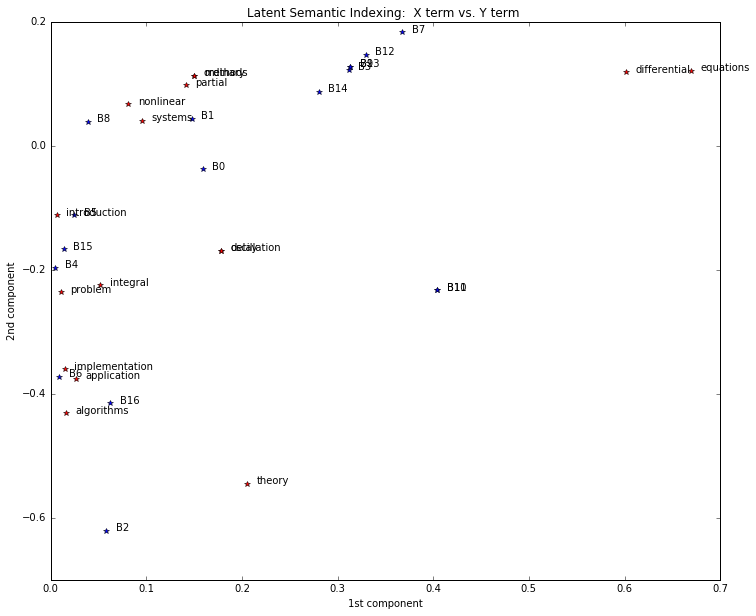

In [18]:
# X:  Keywords

nX = 16
Xtext = [
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        ]

# Y:  Books

nY = 17

# Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
#--------------------------------------------------------------------------
coOccurrence =  np.array([
      [ 0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # algorithms
      [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1 ],  # application
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0 ],  # delay
      [ 0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0 ],  # differential
      [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0 ],  # equations
      [ 0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # implementation
      [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1 ],  # integral
      [ 0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # introduction
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0 ],  # methods
      [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0 ],  # nonlinear
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0 ],  # ordinary
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0 ],  # oscillation
      [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ],  # partial
      [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0 ],  # problem
      [ 0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0 ],  # systems
      [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1 ]   # theory
])

U, S, V = full_svd(coOccurrence)

Xfactor = U[:,:2]
Yfactor = V[:,:2]

# plot the 2D projection of the data

plt.rcParams['figure.figsize'] = (12,10)

text_offset = 0.01
plt.plot( Xfactor[:,0], Xfactor[:,1], 'r*',  Yfactor[:,0], Yfactor[:,1], 'b*' )
plt.hold()

for i in range(nX):
     plt.text( Xfactor[i,0]+text_offset, Xfactor[i,1], Xtext[i])

for i in range(nY):
     plt.text( Yfactor[i,0]+text_offset, Yfactor[i,1], ('B%d' % i))

plt.title( 'Latent Semantic Indexing:  X term vs. Y term ' )
plt.xlabel( '1st component' )
plt.ylabel( '2nd component' )


plt.hold()

# Problem 3: Global Warming again  (30 points)

In HW0, you plotted the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

In this problem we want you to fit linear models through the data.

In [19]:
import pandas as pd

GHCN = pd.read_csv('ghcn.csv', header=None).fillna(0).as_matrix()

#   The data was artificially shifted to [0, 4500]
#     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
#     Since our focus here is on warming, we ignore temperatures below -5.
#   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN[:,2:74] - 2500.0) / 100.0                        # omit the first two columns
GHCN_in_centigrade.shape

(59184, 72)

In [20]:
temperature_anomaly = np.reshape( GHCN_in_centigrade, (36, 12, 137, 72), order="F" )
# convert to a 4D matrix, so we can use slices; use Fortran conventions, like Matlab

temperature_anomaly.shape

(36, 12, 137, 72)

In [21]:
number_of_all_GHCN_values = np.prod( temperature_anomaly.shape )
number_of_all_GHCN_values

4261248

In [22]:
missing_values     = (temperature_anomaly == -25)
non_missing_values = (temperature_anomaly != -25)

number_of_missing_values = missing_values.sum()
number_of_missing_values

3620065

In [23]:
maximum_anomaly_value = temperature_anomaly.max()
maximum_anomaly_value
minimum_anomaly_value = temperature_anomaly[non_missing_values].min()
minimum_anomaly_value

-24.260000000000002

In [24]:
US_latitude  = np.arange(8,12)
US_longitude = np.arange(14,21)
my_years = np.arange(1916,2016)
my_year_indices = np.arange(1916-1880,2016-1880)
temperature_anomaly[US_latitude][:,6,136,US_longitude]  # example: anomaly in the US for July 2016
my_slice = temperature_anomaly[ US_latitude ][ :, :, my_year_indices][ :, :, :, US_longitude ]
my_slice.shape

(4, 12, 100, 7)

In [25]:
total_number_of_grid_squares = len(US_latitude) * len(US_longitude) * 12
N = total_number_of_grid_squares
N

336

In [26]:
average_US_anomaly_by_year = np.reshape( my_slice.sum(axis=3).sum(axis=1).sum(axis=0), (len(my_years), 1) ) / N
# order="F" is not needed for this reshape since the result is a vector

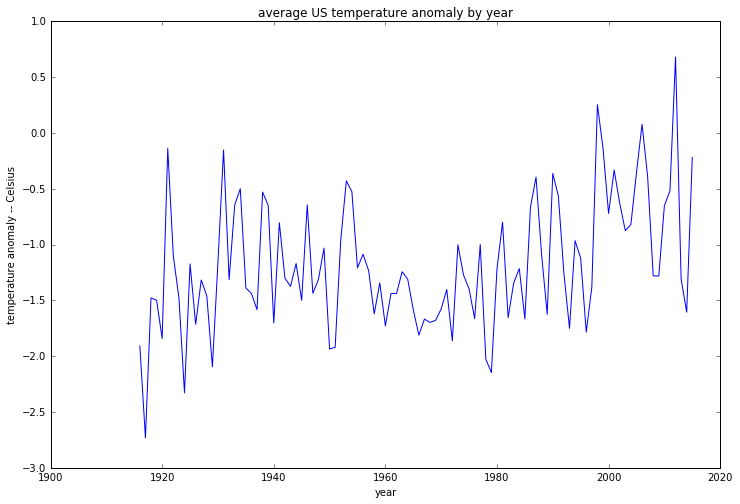

In [27]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot( my_years, average_US_anomaly_by_year )
plt.xlabel('year')
plt.ylabel('temperature anomaly -- Celsius')
plt.title('average US temperature anomaly by year')
plt.show()

### (a) Global Average Temperature Anomaly:  Linear Model (Least Squares)

___Problem:___ fit a line through the data, using Least Squares.

In [28]:
average_global_anomaly_by_year = 0 # fill in something % ..........

linear_model = 0 # fit_curve( my_years, average_global_anomaly_by_year )  % ..........


### (b) Global Average Temperature Anomaly:  Piecewise Linear Model (Least Squares)

___Problem:___ fit a 2-segment piecewise linear model through the data, using Least Squares.

Specifically, find a pair of least squares models, one from 1916 up to year Y, and one from year Y+1 to 2015, such that the SSE (sum of squared errors) is minimized.


In [29]:
minimum_SSE = 0

for Y in range(1917,2014):
   linear_model_up_to_Y = 0 # fit_curve( years_up_to_Y, average_global_anomaly_by_year_up_to_Y )
   linear_model_after_Y = 0 # fit_curve( years_after_Y, average_global_anomaly_by_year_after_Y )
   total_SSE = 0; # SSE_up_to_Y + SSE_after_Y
   if (total_SSE < minimum_SSE):
      do_something = 0
